# **Exercise 3**

In [21]:
import numpy as np
import pandas as pd

import math
from pprint import pprint


In [22]:
import random
import matplotlib.pyplot as plt
import scipy.stats as ss
from tqdm import tqdm
from ast import literal_eval
import copy
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

**Answer 1:**

The Travelling Salesman Problem (TSP) is the challenge of finding the shortest yet most efficient route for a person to travel via, given a list of specific destinations.TSP belongs to the class of combinatorial optimization problems known as NP-complete. The complexity of calculating the best route will increase when we add more destinations to the problem.

 There are a lot of different routes to choose from, but finding the best one — the one that will require the least distance or cost is what is at the core of the TSP problem.

**Answer 4:**

In [23]:
from google.colab import drive
dist11 = np.loadtxt(open("TSP11.csv", "rb"), delimiter = ",")
def cost(dist, cities):
    dist_travelled = 0
    current_pos = cities[0]
    for i in range(1,len(cities)):
        dist_travelled += dist[current_pos][cities[i]]
        current_pos = cities[i] 
    return dist_travelled

**Answer 5:**


In [8]:
def neighbour(current_state):
    feasible_neighbours = []
    for i in range(len(current_state)-1):
        temp = copy.deepcopy(current_state)
        temp[i], temp[i+1] = temp[i+1], temp[i] 
        if ((temp not in feasible_neighbours) == True) and (temp != current_state):
            feasible_neighbours.append(temp)
    current_state[0], current_state[-1] = current_state[-1], current_state[0]
    feasible_neighbours.append(current_state)
    selected_neighbour = random.choice(feasible_neighbours)
    return feasible_neighbours, selected_neighbour

feasible_neighbours, selected_state = neighbour(['A','B','C','D'])
print("Feasible neighbours of the state ['A','B','C','D']: \n")
pprint(feasible_neighbours)

Feasible neighbours of the state ['A','B','C','D']: 

[['B', 'A', 'C', 'D'],
 ['A', 'C', 'B', 'D'],
 ['A', 'B', 'D', 'C'],
 ['D', 'B', 'C', 'A']]


**Answer 8:**



Simulated Annealing algorithm


For randomly initialized tour path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]





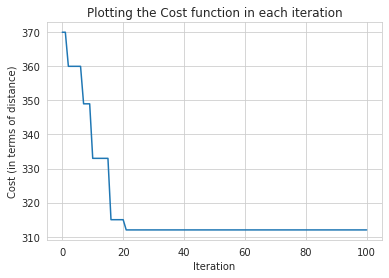

In [28]:
def simulated_annealing(dist, max_iter, alpha, T_0):
    T = T_0
    # current_state = np.random.permutation(np.arange(len(dist))).tolist()
    current_state = [i for i in range(len(dist))] 
    current_state.append(current_state[0])
    initial_state = current_state.copy()
    current_cost = cost(dist, current_state)
    cost_array = [current_cost]
    min_cost = current_cost
    best_state = current_state
    for k in range(max_iter):
        _, new_state = neighbour(current_state[1:-1])
        new_state.insert(0, current_state[-1])
        new_state.append(current_state[-1])
        new_cost = cost(dist, new_state)
        T = cooling_schedule(alpha, T)
        if new_cost <= current_cost:
            current_state = new_state
        else:
            unif = np.random.uniform()
            if unif <= acceptance_prob(current_cost, new_cost, T):
                current_state = new_state
            else:
                pass
        current_cost = cost(dist, current_state)
        if min_cost > current_cost:
            best_state = current_state
            min_cost = current_cost
        cost_array.append(current_cost)
    return initial_state, best_state, cost_array

max_iter = 100
alpha = 0.8
T_0 = 1    

initial_sol_11, solution_11, cost_array_11 = simulated_annealing(dist11, max_iter, alpha, T_0)

print()
print("For randomly initialized tour path:", initial_sol_11)
print("Best Solution (Best route):", solution_11)
print("\n")
print()
plt.plot(cost_array_11)
plt.title("Plotting the Cost function in each iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.show()

In the above plot I see that cost stops changing after approx 21 iterations. However,  before that, the cost decreases rapidly with each iteration as the optimal tour selected by the algorithm changes.

When we take different T and keeping alpha values fixed


------------------- Different T_0 -------------------

For T_0: 1
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 9, 5, 6, 10, 7, 8, 0]


For T_0: 2
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 9, 5, 6, 10, 7, 8, 0]


For T_0: 3
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 2, 4, 9, 5, 3, 6, 7, 8, 10, 1, 0]


For T_0: 4
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 8, 2, 4, 3, 5, 9, 7, 6, 1, 10, 0]




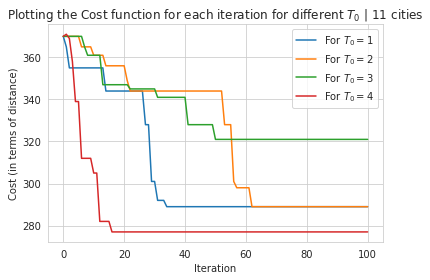

In [29]:
T_list = [1,2,3,4]
alpha = 0.8
max_iter = 100
best_sols = []
print()
print("------------------- Different T_0 -------------------")
print()
for T in T_list:
    initial_sol, solution, cost_array = simulated_annealing(dist11, max_iter, alpha, T)
    best_sols.append(solution)
    plt.plot(cost_array, label = f"For $T_0 = {T}$")
    print(f"For T_0: {T}")
    print("Initial Tour Path:", initial_sol)
    print("Best Solution (Best travel route):", solution)
    print("\n")
    
plt.title("Plotting the Cost function for each iteration for different $T_0$ | 11 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.legend()
plt.show()

While varying $T_0 = \{1,2,3,4\}$ and keeping $\alpha$ fixed

Cost decreases with each iteration as the optimal tour selected by the algorithm changes in each iteration.

I observe that minimum cost is observed for $T_0 = 2$, $T_0 = 3$ and $4$ ($T_0= 4$ takes higher iterations to reach the minimum cost comparison to $T_0 = 2$ and$T_0 = 3$). So, for different runs of the algorithm, the conclusion might change.


When we take different alpha and keeping T fixed


-------------------- different alpha -------------------


For alpha: 0.8
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]



For alpha: 0.85
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]



For alpha: 0.9
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 10, 2, 4, 3, 9, 5, 6, 1, 7, 8, 0]



For alpha: 0.95
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 7, 4, 3, 9, 5, 6, 10, 8, 0]





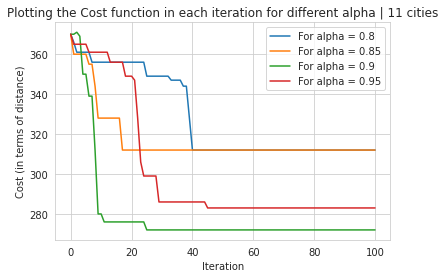

In [26]:
T_0 = 1 
alpha_list = [0.8, 0.85, 0.9, 0.95]
max_iter = 100
best_sols = []
print()
print("-------------------- different alpha -------------------")
print()
print()
for alpha in alpha_list:
    initial_sol, solution, cost_array = simulated_annealing(dist11, max_iter, alpha, T_0)
    best_sols.append(solution)
    plt.plot(cost_array, label = f"For alpha = {alpha}")
    print(f"For alpha: {alpha}")
    print("Initial Tour Path:", initial_sol)
    print("Best Solution (Best travel route):", solution)
    print("\n")
    print()
plt.title(r"Plotting the Cost function in each iteration for different alpha | 11 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.legend()
plt.show()

While taking different $\alpha = \{0.8, 0.85, 0.9, 0.95\}$ and keep $T_0$ fixed

Cost decrease fo each iteration as the optimal tour selected by the algorithm changes.

For the particular run above, the minimum cost (and hence the best choice of tour path) is obtained from $\alpha = 0.95$


**Answer 9:**

The alternate cooling schedule is as follows:
$T_k = \frac{T_0}{1 + \alpha\ log(1+k)}$

Function for simulated annealing using new cooling schedule


For the 11 city case:

For randomly initialized tour path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 2, 4, 3, 9, 5, 6, 7, 8, 1, 10, 0]





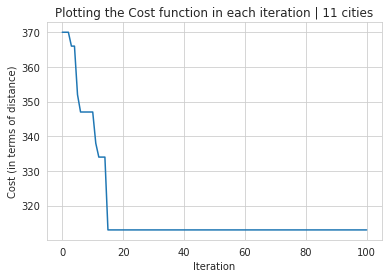

In [27]:
def new_cooling_schedule(alpha, k):
    return T_0/(1+alpha*np.log(1+k))
def new_simulated_annealing(dist, max_iter, alpha, T_0):
    T = T_0
    # current_state = np.random.permutation(np.arange(len(dist))).tolist()
    current_state = [i for i in range(len(dist))] 
    current_state.append(current_state[0])
    initial_state = current_state.copy()
    current_cost = cost(dist, current_state)
    cost_array = [current_cost]
    min_cost = current_cost
    best_state = current_state
    for k in range(max_iter):
        _, new_state = neighbour(current_state[1:-1])
        new_state.insert(0, current_state[-1])
        new_state.append(current_state[-1])
        new_cost = cost(dist, new_state)
        T = new_cooling_schedule(alpha, k)
        if new_cost <= current_cost:
            current_state = new_state
        else:
            unif = np.random.uniform()
            if unif <= acceptance_prob(current_cost, new_cost, T):
                current_state = new_state
            else:
                pass
        current_cost = cost(dist, current_state)
        if min_cost > current_cost:
            best_state = current_state
            min_cost = current_cost
        cost_array.append(current_cost)
    return initial_state, best_state, cost_array

max_iter = 100
alpha = 1.8
T_0 = 1
initial_sol, solution, cost_array = new_simulated_annealing(dist11, max_iter, alpha, T_0)
print()
print("For the 11 city case:\n")
print("For randomly initialized tour path:", initial_sol)
print("Best Solution (Best route):", solution)
print("\n")
print()
plt.plot(cost_array)
plt.title("Plotting the Cost function in each iteration | 11 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.show()